In [28]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [30]:
df = pd.read_csv('./kaggle/input/spaceship-titanic/train_update.csv')
df.shape  

(8494, 24)

In [31]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Cabin_num', 'Cabin_port', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpend', 'Name',
       'Transported'],
      dtype='object')

#### scaler

In [32]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = \
# train_test_split(df.drop(['PassengerId','Transported','Name'],axis=1),df['Transported'], test_size=0.2, random_state=42)


In [39]:
# df.info()
df.drop(['PassengerId','Transported','Name','VIP'],axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8494 non-null   float64
 1   CryoSleep     8494 non-null   float64
 2   Cabin_A       8494 non-null   float64
 3   Cabin_B       8494 non-null   float64
 4   Cabin_C       8494 non-null   float64
 5   Cabin_D       8494 non-null   float64
 6   Cabin_E       8494 non-null   float64
 7   Cabin_F       8494 non-null   float64
 8   Cabin_G       8494 non-null   float64
 9   Cabin_T       8494 non-null   float64
 10  Cabin_num     8494 non-null   float64
 11  Cabin_port    8494 non-null   float64
 12  Destination   8494 non-null   float64
 13  Age           8494 non-null   float64
 14  RoomService   8494 non-null   float64
 15  FoodCourt     8494 non-null   float64
 16  ShoppingMall  8494 non-null   float64
 17  Spa           8494 non-null   float64
 18  VRDeck        8494 non-null 

#### minxax scaler

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split

df = pd.read_csv('./kaggle/input/spaceship-titanic/train_update.csv')

def selectscaler(scaler_name):
    global X_train,X_test,y_train,y_test
    
    X_train, X_test, y_train, y_test = \
    train_test_split(df.drop(['PassengerId','Transported','Name','VIP'],axis=1),df['Transported'], test_size=0.2, random_state=42)

    if scaler_name == 'StandardScaler':
        #StandardScaler
        scaler = StandardScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        return print('StandardScaler Results')
    
    elif scaler_name == "MinMaxScaler":
        # MinMaxScaler
        scaler = MinMaxScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        return print('MinMaxScaler Results')

    elif scaler_name == "RobustScaler":
        # RobustScaler
        scaler = RobustScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        
        return print('RobustScaler Results')
    else:
        return print('Results not scaled, Please use : StandardScaler,MinMaxScaler,RobustScaler')

selectscaler('MinMaxScaler')

MinMaxScaler Results


#### 3-2 모델

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import pandas as pd

from MyModule import girdcvconv as gc


estimator = DecisionTreeClassifier()

criterion_list =  ['gini','entropy'] 
splitter_list =  ['best','random']
max_depth_list =  np.arange(2, 20)
min_samples_split_list = np.arange(2, 20)                                   # 노드 분할 위한 최소 표본수 작으면 과적합, 반대의 경우 과소적합
min_weight_fraction_leaf_list =  np.append(0.0,np.arange(0.1, 0.5, 0.1))    # 비율 커지면 과대적합 줄어듬 0,5보다 작게 해야한다
min_impurity_decrease_list = np.append(0.0,np.arange(0.3, 0.5, 0.1))        # 비율 노드분할 관련

parameter={
    'criterion' : criterion_list ,
    'splitter'  : splitter_list,
    'max_depth' : max_depth_list,
    'min_samples_split' : min_samples_split_list,
    'min_weight_fraction_leaf' : min_weight_fraction_leaf_list,    
    'min_impurity_decrease' :min_impurity_decrease_list,
    'random_state': [42]
}

model = GridSearchCV(estimator, param_grid=parameter, cv=5, verbose=1, n_jobs=-1, refit=True)
# verbose 출력 실행 모듈
model.fit(X_train,y_train)

print('best_params : ', model.best_params_)
print('best_score_ : ', model.best_score_)

gc.paramsTocsv(data_name='space01', scaler='MinMaxScaler', model_name='DecisionTreeClassifier', best_params=model.best_params_, best_score=model.best_score_)

Fitting 5 folds for each of 19440 candidates, totalling 97200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'min_impurity_decrease': array([0. , 0.3, 0.4]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'min_weight_fraction_leaf': array([0. , 0.1, 0.2, 0.3, 0.4]),
                         'random_state': [42], 'splitter': ['best', 'random']},
             verbose=1)

best_params :  {'criterion': 'gini', 'max_depth': 7, 'min_impurity_decrease': 0.0, 'min_samples_split': 15, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
best_score_ :  0.7907284768211921


In [7]:
## 예시
# from MyModule import girdcvconv as gc
# best_params =  {'criterion': 'gini', 'max_depth': 19, 'min_impurity_decrease': 0.0, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
# best_score_ =  0.7113550153749467
# gc.paramsTocsv(data_name='obesity', scaler='StandardScaler', model_name='DecisionTreeClassifier', best_params=best_params, best_score=best_score_)

In [67]:
# 생성된 dataframe 확인
import pandas as pd
df = pd.read_csv('./modeldata/space01.csv')
df

,date,model_name,scaler,best_score,criterion,max_depth,min_impurity_decrease,min_samples_split,min_weight_fraction_leaf,random_state,splitter
0,2022-11-21 13:42:55,DecisionTreeClassifier,StandardScaler,0.711355,gini,19,0.0,2,0.0,42,best
1,2022-11-21 13:43:08,DecisionTreeClassifier,StandardScaler,0.711355,gini,19,0.0,2,0.0,42,best
2,2022-11-21 14:53:29,DecisionTreeClassifier,StandardScaler,0.711377,gini,19,0.0,2,0.0,42,best


In [10]:
# 특정 데이터프레임 선택
import pandas as pd
from MyModule import selectparameter as sp

bestparams = sp.selectparam('obesity',0)
print(bestparams)

{'criterion': ['gini'], 'max_depth': [19], 'min_impurity_decrease': [0.0], 'min_samples_split': [2], 'min_weight_fraction_leaf': [0.0], 'random_state': [42], 'splitter': ['best']}


In [ ]:
#DecisionTreeClassifier 최적의 파라미터를 바로 삽입
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

estimator = DecisionTreeClassifier()
model = GridSearchCV(estimator, param_grid=bestparams, cv=3, verbose=1, n_jobs=-1, refit=True)
# verbose 출력 실행 모듈
model.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

[0]	validation_0-logloss:0.59062
[1]	validation_0-logloss:0.53494
[2]	validation_0-logloss:0.50013
[3]	validation_0-logloss:0.47849
[4]	validation_0-logloss:0.46413
[5]	validation_0-logloss:0.45035
[6]	validation_0-logloss:0.44229
[7]	validation_0-logloss:0.43393
[8]	validation_0-logloss:0.42835
[9]	validation_0-logloss:0.42488
[10]	validation_0-logloss:0.42497
[11]	validation_0-logloss:0.42023
[12]	validation_0-logloss:0.41666
[13]	validation_0-logloss:0.41368
[14]	validation_0-logloss:0.41444
[15]	validation_0-logloss:0.41325
[16]	validation_0-logloss:0.41297
[17]	validation_0-logloss:0.41257
[18]	validation_0-logloss:0.41065
[19]	validation_0-logloss:0.40907
[20]	validation_0-logloss:0.40831
[21]	validation_0-logloss:0.40740
[22]	validation_0-logloss:0.40822
[23]	validation_0-logloss:0.40785
[24]	validation_0-logloss:0.40757
[25]	validation_0-logloss:0.40687
[26]	validation_0-logloss:0.40629
[27]	validation_0-logloss:0.40646
[28]	validation_0-logloss:0.40672
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

0.7987051206592113

confusion_matrix : 
 [[682 169]
 [173 675]]


<AxesSubplot: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

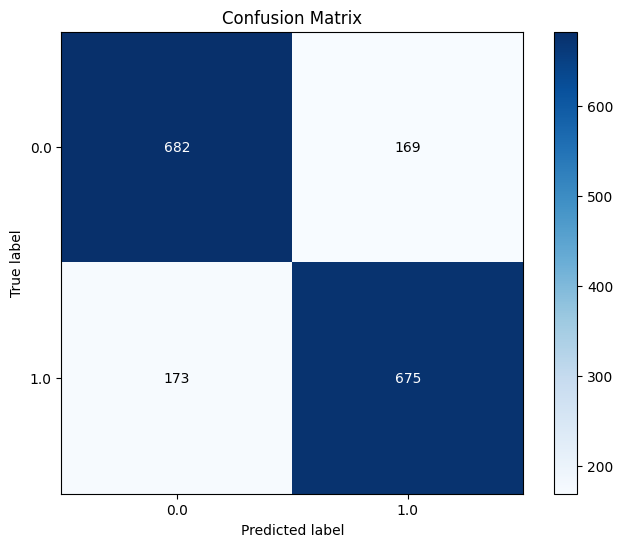

In [38]:
import xgboost as xgb
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

model = xgb.XGBClassifier(early_stopping_rounds=10)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set)#, verbose=True

pred = model.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()